<a href="https://colab.research.google.com/github/Jash-Bhatia/Machine_Learning/blob/master/ML_Lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoder

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

!pip install livelossplot
from livelossplot import PlotLossesKeras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
x_train_gray = x_train[:,:,:,0]
x_test_gray = x_test[:,:,:,0]

In [3]:
print('Training Shape:', x_train_gray.shape)
print('Number of train samples:', x_train_gray.shape[0])
print('Number of test samples:', x_test_gray.shape[0])
x_val = x_test_gray[:7000]
x_test = x_test_gray[7000:]
print("Validation Data Shape: {0} \nTest Data Shape: {1}".format(x_val.shape, x_test.shape))

Training Shape: (50000, 32, 32)
Number of train samples: 50000
Number of test samples: 10000
Validation Data Shape: (7000, 32, 32) 
Test Data Shape: (3000, 32, 32)


In [4]:
input_img = Input(shape=(32, 32))

#Encoding
x = Dense(64, activation = 'relu')(input_img)
x = Dense(32, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
encoded = Dense(8, activation = 'relu')(x)

# Decoding
x = Dense(8, activation = 'relu')(encoded)
x = Dense(16, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
decoded = Dense(32, activation = 'sigmoid')(x)

In [5]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
print('Training Shape:', x_train_gray.shape)
print("Validation Shape: ",(x_val.shape, x_test.shape))
print('Testing Shape:', x_test.shape)

Training Shape: (50000, 32, 32)
Validation Shape:  ((7000, 32, 32), (3000, 32, 32))
Testing Shape: (3000, 32, 32)


In [7]:
batch_size = 32
num_classes = 10
epochs = 10
chkpt = 'AutoEncoder_Cifar10_Deep_weights.hdf5'
mc = ModelCheckpoint(filepath = chkpt, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

history = model.fit(x_train_gray, x_train_gray, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_val, x_val), 
                    callbacks = [mc])

Epoch 1/10
1557/1563 [============================>.] - ETA: 0s - loss: 0.5893
Epoch 00001: val_loss improved from inf to 0.57980, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5892 - val_loss: 0.5798
Epoch 2/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.5782
Epoch 00002: val_loss improved from 0.57980 to 0.57500, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5783 - val_loss: 0.5750
Epoch 3/10
1553/1563 [============================>.] - ETA: 0s - loss: 0.5731
Epoch 00003: val_loss improved from 0.57500 to 0.57343, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5731 - val_loss: 0.5734
Epoch 4/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.5727
Epoch 00004: val_loss improved from 0.57343 to 0.57332, saving model to AutoEncoder_C

In [8]:
score = model.evaluate(x_test, x_test, verbose=1)
print(score)

94/94 [==============================] - 0s 2ms/step - loss: 0.5726
0.5725761651992798


In [9]:
c10test = model.predict(x_test)
c10val = model.predict(x_val)
print("Validation Dataset Score: {0}\nTest Dataset Score: {1}".format(np.average(c10val), np.average(c10test)))

Validation Dataset Score: 0.492625892162323
Test Dataset Score: 0.4875607192516327


In [10]:
def showImage(orig, dec, num=10):
  n = num 
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(orig[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(dec[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

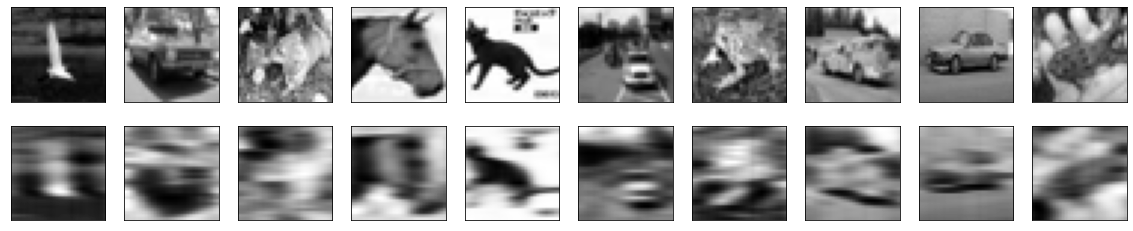

In [11]:
showImage(x_test, c10test)

# Clustering

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering, SpectralClustering, Birch

In [15]:
data = pd.read_excel('AirQualityUCI.xlsx')
data.shape

(9357, 15)

In [16]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [17]:
data.replace(to_replace = -200, value = np.NaN, inplace = True )
num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [18]:
data.drop(['NMHC(GT)'], axis = 1, inplace = True)
num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [19]:
data["T"] = data.groupby("Date")["T"].transform(lambda x: x.fillna(x.mean()))
data["CO(GT)"] = data.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
data["NOx(GT)"] = data.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
data["NO2(GT)"] = data.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

In [ ]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm')

In [21]:
data.fillna(method='ffill', inplace= True)

num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date             0.0
Time             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

In [22]:
X1 = data.drop(['Time'], axis=1, inplace=False)
x = X1.drop(['Date'], axis=1, inplace=False)
x.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [27]:
birch = Birch()
pred_birch = birch.fit_predict(x)
pred_birch

array([1, 0, 0, ..., 0, 0, 0])

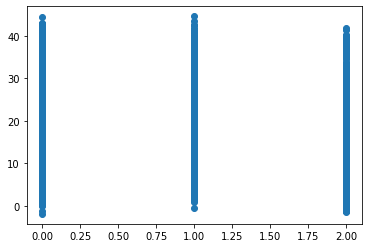

In [29]:
plt.scatter(pred_birch, x['T'], cmap = 'coolwarm')

In [28]:
agg = AgglomerativeClustering(affinity = 'euclidean', compute_full_tree = 'auto', connectivity = None, 
                              distance_threshold = None, linkage = 'ward', memory = None, n_clusters = 3)
pred_agg = agg.fit_predict(x)
pred_agg

array([0, 0, 0, ..., 0, 2, 0])